In [69]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file_name = 'Uber-Jan-Feb-FOIL.csv'
df = pd.read_csv(file_name)

# Convert 'date' column to datetime format to handle dates properly
df['datetime'] = pd.to_datetime(df['date'])

# Group by 'datetime' and sum the 'active_vehicles' and 'trips'
summary_df = df.groupby('datetime')[['active_vehicles', 'trips']].sum()

# Sort the summary DataFrame by 'datetime' to ensure chronological order
summary_df = summary_df.sort_index()

# Display the summary DataFrame
summary_df.head()


,active_vehicles,trips
datetime,,
2015-01-01,6885,56437
2015-01-02,6330,39189
2015-01-03,6510,58449
2015-01-04,5838,40798
2015-01-05,6884,42752


In [70]:
import pandas as pd

# Read the NYC weather data CSV file into a pandas DataFrame
nyc_file_name = 'NYC.csv'
nyc_data = pd.read_csv(nyc_file_name)


# Convert the 'datetime' column to datetime format for proper sorting
nyc_data['datetime'] = pd.to_datetime(nyc_data['datetime'])

# Select the relevant columns and organize by datetime
selected_columns = ['datetime', 'tempmax', 'humidity', 'precip', 'windspeed']
organized_nyc_data = nyc_data[selected_columns]

# Sort the DataFrame by datetime to ensure proper chronological order
organized_nyc_data = organized_nyc_data.sort_values(by='datetime')

# Reset index for a clean DataFrame
organized_nyc_data.reset_index(drop=True, inplace=True)

# Display the organized NYC weather DataFrame
("\nOrganized NYC Weather Data:")
organized_nyc_data.head()


,datetime,tempmax,humidity,precip,windspeed
0,2015-01-01,3.7,38.7,0.000,23.0
1,2015-01-02,5.7,42.0,0.024,27.4
2,2015-01-03,4.7,70.9,17.008,15.9
3,2015-01-04,13.0,88.5,8.886,27.2
4,2015-01-05,10.0,37.6,0.000,39.3


In [71]:
import pandas as pd

# Assuming summary_df and organized_nyc_data are already defined

# Merge the two DataFrames on 'datetime'
merged_df = pd.merge(summary_df.reset_index(), organized_nyc_data, on='datetime', how='outer')

# Display the merged DataFrame
merged_df.head()


,datetime,active_vehicles,trips,tempmax,humidity,precip,windspeed
0,2015-01-01,6885,56437,3.7,38.7,0.000,23.0
1,2015-01-02,6330,39189,5.7,42.0,0.024,27.4
2,2015-01-03,6510,58449,4.7,70.9,17.008,15.9
3,2015-01-04,5838,40798,13.0,88.5,8.886,27.2
4,2015-01-05,6884,42752,10.0,37.6,0.000,39.3


In [72]:
# Add Month to DF

merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

merged_df['month_name'] = merged_df['datetime'].dt.month_name()

merged_df.head()


,datetime,active_vehicles,trips,tempmax,humidity,precip,windspeed,month_name
0,2015-01-01,6885,56437,3.7,38.7,0.000,23.0,January
1,2015-01-02,6330,39189,5.7,42.0,0.024,27.4,January
2,2015-01-03,6510,58449,4.7,70.9,17.008,15.9,January
3,2015-01-04,5838,40798,13.0,88.5,8.886,27.2,January
4,2015-01-05,6884,42752,10.0,37.6,0.000,39.3,January


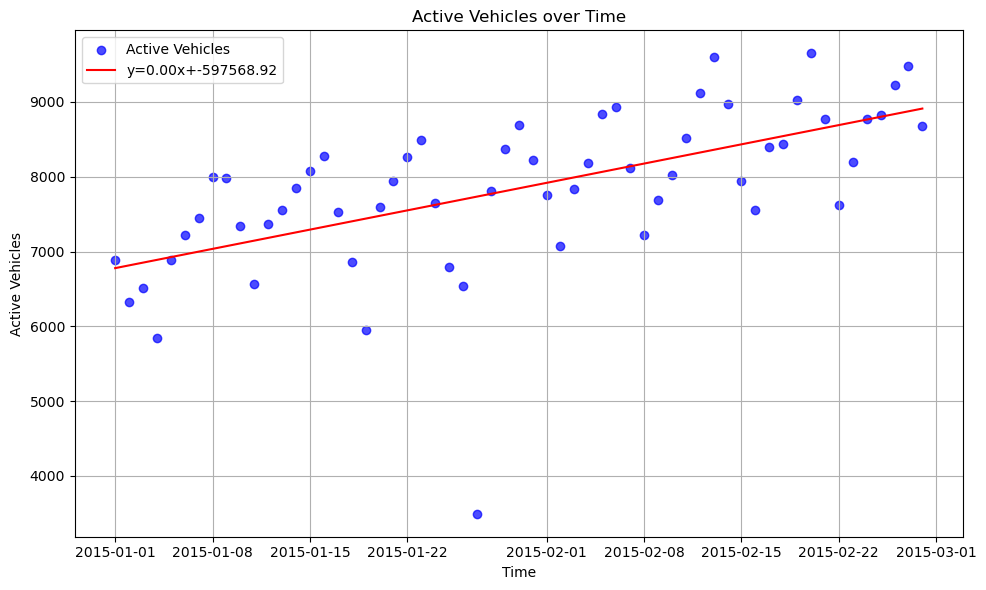

Correlation coefficient (r): 0.598


In [73]:
# Anna Question - How did the number of Uber Drivers and associated trips evolve over the course of this data set?

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Convert 'datetime' column to datetime format
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

# Ensure 'active_vehicles' is numeric
merged_df['active_vehicles'] = pd.to_numeric(merged_df['active_vehicles'], errors='coerce')

# Remove any NaN values
merged_df = merged_df.dropna(subset=['datetime', 'active_vehicles'])

# Convert datetime to numeric format (timestamp) for regression analysis
merged_df['timestamp'] = merged_df['datetime'].astype(np.int64) // 10**9  # Convert to seconds

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['timestamp'], merged_df['active_vehicles'])

# Calculate regression values
regress_values = slope * merged_df['timestamp'] + intercept

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['datetime'], merged_df['active_vehicles'], alpha=0.7, color='blue', label='Active Vehicles')
plt.plot(merged_df['datetime'], regress_values, 'red', label=f"y={slope:.2f}x+{intercept:.2f}")
plt.title('Active Vehicles over Time')
plt.xlabel('Time')
plt.ylabel('Active Vehicles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation coefficient (r): {r_value:.3f}")

# Significant Active Vehicle increase over time

/var/folders/hd/8jgckwtx75j2448f8r5pb_f00000gn/T/ipykernel_33129/3103178258.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = merged_df.groupby('month_name').agg({


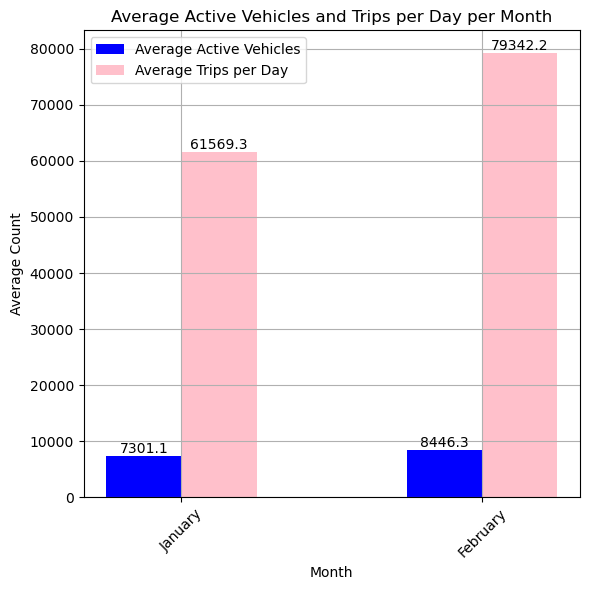

In [74]:
import matplotlib.pyplot as plt
import numpy as np

merged_df['month_name'] = pd.Categorical(merged_df['month_name'],
    categories=['January', 'February'],
    ordered=True)

# Group by the 'month' column and calculate the average of 'active_vehicles' and 'trips' per month
monthly_avg = merged_df.groupby('month_name').agg({
    'active_vehicles': 'mean',
    'trips': 'mean'
})

# Plotting the bar chart
plt.figure(figsize=(6, 6))

# Define the width of each bar and position them with an offset
bar_width = 0.25
index = np.arange(len(monthly_avg))

# Plot average active vehicles
bars1 = plt.bar(index, monthly_avg['active_vehicles'], bar_width, label='Average Active Vehicles', color='blue')
# Plot average trips
bars2 = plt.bar(index + bar_width, monthly_avg['trips'], bar_width, label='Average Trips per Day', color='pink')

# Add data labels for average active vehicles
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# Add data labels for average trips
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# Add labels and title
plt.title('Average Active Vehicles and Trips per Day per Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(index + bar_width / 2, monthly_avg.index.astype(str), rotation=45)
plt.legend()

# Display grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

# In just a month timeframe, the average active vehicles jumped by 1000+!
# Percentage change in Average Active vehicles from Jan to Feb is 15.69% where Average Trips per Day is 28.87%.
# While both increased between the two months, trips 